In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import uncertainties as un
from matplotlib import pyplot as plt
from scipy.stats import t
from uncertainties import unumpy as unp

In [17]:
df = pd.read_hdf("measurements.h5")
print(f"loaded data from {len(df)} shots")
df.head()

loaded data from 58 shots


,date,shot,fuel,oxidizer,diluent,t_0,u_t_0,p_0_nom,p_0,u_p_0,phi_nom,phi,u_phi,dil_mf_nom,dil_mf,u_dil_mf,wave_speed,u_wave_speed,cell_size,u_cell_size
0,2020-11-23,0,CH4,N2O,N2,288.854426,3.487385,101325.0,101321.386226,3.933011,1.0,1.070145,0.000710,0.10,0.232712,0.000099,2059.459459,2.811308,10.891977,0.720418
1,2020-12-10,0,CH4,N2O,N2,288.249476,3.487385,101325.0,101441.621314,3.951862,0.4,0.412540,0.000307,0.15,0.250255,0.000054,1795.959596,2.137938,19.830281,1.015184
2,2020-11-25,0,CH4,N2O,N2,289.117440,3.487385,101325.0,101312.656033,3.990513,1.0,1.088798,0.000911,0.20,0.387742,0.000101,1961.029412,2.549002,17.327150,0.677593
3,2020-12-09,0,CH4,N2O,CO2,288.718362,3.487385,101325.0,101432.336834,3.883890,0.4,0.413831,0.000259,0.10,0.102603,0.000052,1783.946488,2.109433,18.495954,0.739494
4,2020-11-12,0,CH4,N2O,N2,290.323806,3.493193,101325.0,101327.131884,4.019152,1.0,1.095292,0.000808,0.20,0.386997,0.000086,1979.220779,2.596513,22.599119,0.708040


In [10]:
def aggregate_measurements(measurements: pd.Series, uncertainties: pd.Series, alpha: float):
    n_meas = len(measurements)
    t_stat = t.ppf(alpha, n_meas - 1)
    measured = unp.uarray(measurements.values, uncertainties.values).mean()
    
    return measured.nominal_value, measured.std_dev * t_stat / np.sqrt(n_meas)

In [23]:
alpha = 0.975
for conditions, data in df.groupby(["diluent", "phi_nom", "dil_mf_nom"]):
    size = aggregate_measurements(data["cell_size"], data["u_cell_size"], alpha)
    speed = aggregate_measurements(data["wave_speed"], data["u_wave_speed"], alpha)
    print(conditions, f"- {len(data)} shots")
    print(f"{size[0]:.2f} +/- {size[1]:.2f} mm")
    print(f"{speed[0]:.2f} +/- {speed[1]:.2f} m/s")
    print()

('CO2', 0.4, 0.1) - 3 shots
17.71 +/- 1.19 mm
1780.06 +/- 3.01 m/s

('CO2', 0.4, 0.15) - 3 shots
26.12 +/- 1.19 mm
1742.32 +/- 2.89 m/s

('CO2', 0.4, 0.2) - 2 shots
45.27 +/- 5.34 mm
1680.94 +/- 11.92 m/s

('CO2', 0.7, 0.1) - 3 shots
11.74 +/- 1.32 mm
1944.39 +/- 3.59 m/s

('CO2', 0.7, 0.15) - 2 shots
14.20 +/- 4.61 mm
1884.81 +/- 14.96 m/s

('CO2', 0.7, 0.2) - 3 shots
22.57 +/- 1.19 mm
1808.16 +/- 3.11 m/s

('CO2', 1.0, 0.1) - 3 shots
10.73 +/- 1.01 mm
2030.77 +/- 3.92 m/s

('CO2', 1.0, 0.15) - 3 shots
13.66 +/- 1.19 mm
1965.92 +/- 3.67 m/s

('CO2', 1.0, 0.2) - 3 shots
18.60 +/- 1.20 mm
1907.28 +/- 3.46 m/s

('N2', 0.4, 0.1) - 2 shots
15.26 +/- 5.40 mm
1880.07 +/- 14.89 m/s

('N2', 0.4, 0.15) - 2 shots
20.88 +/- 6.28 mm
1800.52 +/- 13.65 m/s

('N2', 0.7, 0.1) - 2 shots
12.37 +/- 4.51 mm
2001.61 +/- 16.87 m/s

('N2', 0.7, 0.15) - 2 shots
18.31 +/- 4.47 mm
1972.15 +/- 16.38 m/s

('N2', 0.7, 0.2) - 2 shots
23.97 +/- 5.50 mm
1899.91 +/- 15.20 m/s

('N2', 1.0, 0.1) - 2 shots
10.98 +/- 4.64

Final manuscript data needs to have t statistic applied

In [31]:
with pd.HDFStore("simulated_and_measured.h5", "r") as store:
    print(store.keys())
    print(store.data["u_cell_size_measured"].head())
    print(store.data_fixed_uncert["u_cell_size_measured"].head())
    df_sim_meas = store.data_fixed_uncert
df_sim_meas.head()

['/data', '/data_fixed_uncert']
0    0.480062
1    0.479481
2    0.594380
3    0.530100
4    0.512883
Name: u_cell_size_measured, dtype: float64
0    2.065540
1    2.063038
2    7.552310
3    2.280838
4    6.516796
Name: u_cell_size_measured, dtype: float64


,diluent,phi_nom,dil_mf_nom,p_0,u_p_0,t_0,phi,u_phi,dil_mf,u_dil_mf,wave_speed,u_wave_speed,cell_size_measured,u_cell_size_measured,cell_size_gavrikov,cell_size_ng,cell_size_westbrook
0,CO2,0.4,0.10,101393.842884,2.307000,289.846188,0.419182,0.000208,0.103943,0.000040,1780.064483,1.212763,17.711596,2.065540,770.810052,74.459337,40.577703
1,CO2,0.4,0.15,101400.200470,1.609842,290.021614,0.416662,0.000215,0.154795,0.000036,1742.324854,1.161985,26.122865,2.063038,2328.318780,137.733125,76.176883
2,CO2,0.4,0.20,101383.316513,1.976709,290.005443,0.425508,0.000378,0.207642,0.000063,1680.937965,1.326527,45.265852,7.552310,7173.643295,262.627217,148.643042
3,CO2,0.7,0.10,101393.617108,2.121143,289.767941,0.735369,0.000243,0.104023,0.000045,1944.385714,1.446872,11.744907,2.280838,275.832035,41.773144,24.192077
4,CO2,0.7,0.15,101412.528953,2.179424,289.308769,0.730354,0.000250,0.154600,0.000045,1884.805654,1.665023,14.199823,6.516796,777.986099,72.212132,43.211558


In [46]:
df_test = df_sim_meas.copy()
sim_meas_ratio = df_test["cell_size_westbrook"] / unp.uarray(df_test["cell_size_measured"], df_test["u_cell_size_measured"])
df_test["sim_meas"] = unp.nominal_values(sim_meas_ratio)
df_test["u_sim_meas"] = unp.std_devs(sim_meas_ratio)

In [47]:
df_test

,diluent,phi_nom,dil_mf_nom,p_0,u_p_0,t_0,phi,u_phi,dil_mf,u_dil_mf,wave_speed,u_wave_speed,cell_size_measured,u_cell_size_measured,cell_size_gavrikov,cell_size_ng,cell_size_westbrook,sim_meas,u_sim_meas
0,CO2,0.4,0.10,101393.842884,2.307000,289.846188,0.419182,0.000208,0.103943,0.000040,1780.064483,1.212763,17.711596,2.065540,770.810052,74.459337,40.577703,2.291025,0.267181
1,CO2,0.4,0.15,101400.200470,1.609842,290.021614,0.416662,0.000215,0.154795,0.000036,1742.324854,1.161985,26.122865,2.063038,2328.318780,137.733125,76.176883,2.916100,0.230297
2,CO2,0.4,0.20,101383.316513,1.976709,290.005443,0.425508,0.000378,0.207642,0.000063,1680.937965,1.326527,45.265852,7.552310,7173.643295,262.627217,148.643042,3.283779,0.547877
3,CO2,0.7,0.10,101393.617108,2.121143,289.767941,0.735369,0.000243,0.104023,0.000045,1944.385714,1.446872,11.744907,2.280838,275.832035,41.773144,24.192077,2.059793,0.400008
4,CO2,0.7,0.15,101412.528953,2.179424,289.308769,0.730354,0.000250,0.154600,0.000045,1884.805654,1.665023,14.199823,6.516796,777.986099,72.212132,43.211558,3.043105,1.396588
5,CO2,0.7,0.20,101412.244820,1.938748,290.890143,0.739247,0.000282,0.207012,0.000045,1808.159887,1.251217,22.565446,2.059861,2342.272709,127.963220,79.797353,3.536263,0.322804
6,CO2,1.0,0.10,101396.288279,2.719599,290.170199,1.048230,0.000235,0.103722,0.000039,2030.771107,1.578345,10.729874,1.757072,213.161962,33.742735,19.590121,1.825755,0.298977
7,CO2,1.0,0.15,101404.272743,1.800340,290.141360,1.048723,0.000231,0.154530,0.000037,1965.920228,1.479180,13.662187,2.065471,668.234272,56.702087,34.275813,2.508809,0.379286
8,CO2,1.0,0.20,101410.128009,1.557379,290.441929,1.052847,0.000288,0.206571,0.000042,1907.275986,1.392106,18.601504,2.084832,2103.742085,98.650499,62.648736,3.367939,0.377474
9,N2,0.4,0.10,101368.606788,2.121188,289.359526,0.416727,0.000224,0.180426,0.000041,1880.070432,1.657319,15.263125,7.642898,275.935516,47.345764,24.757695,1.622059,0.812234


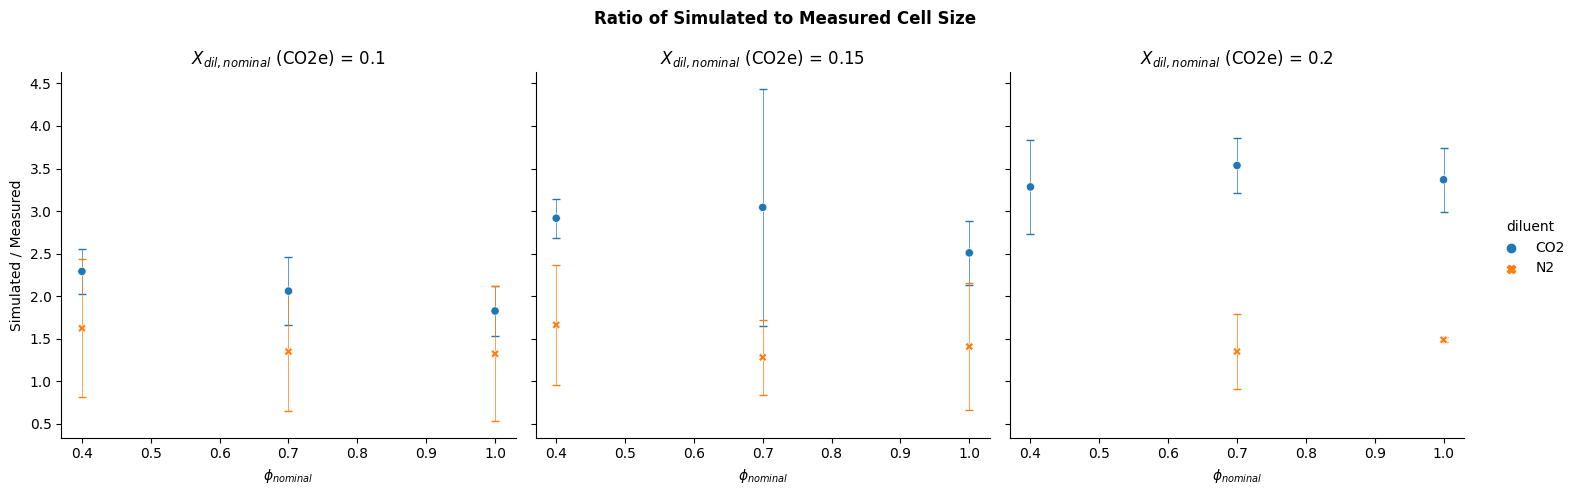

In [57]:
cell_size_plots = sns.relplot(
    x="phi_nom",
    y="sim_meas",
    col="dil_mf_nom",
    hue="diluent",
    style="diluent",
    # row="method",
    data=df_test,
    zorder=4,
)
for ax in cell_size_plots.axes.flatten():
    ax.set_ylabel("Simulated / Measured")
    if ax.get_xlabel() is not None:
        ax.set_xlabel(r"$\phi_{nominal}$")
    title = ax.get_title()
    dil_mf_nom = float(title.split(" = ")[1])
    sub_df = df_test[(df_test["dil_mf_nom"] == dil_mf_nom)]
    for _, sub_df_diluent in sub_df.groupby("diluent"):
        ax.errorbar(
            x=sub_df_diluent["phi_nom"],
            y=sub_df_diluent["sim_meas"],
            yerr=sub_df_diluent["u_sim_meas"],
            ls="None",
            lw=0.5,
            zorder=3,
            capsize=3,
            marker=None,
        )
    ax.set_title(
        ax.get_title()
        .replace("dil_mf_nom", "$X_{dil, nominal}$ (CO2e)")
        .replace("method = ", "")
        .replace("simulated", "Simulated")
        .replace("measured", "Measured")
        .replace(" | ", ", ")
    )
plt.suptitle("Ratio of Simulated to Measured Cell Size", weight="bold")
cell_size_plots.tight_layout()